In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import pickle

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pymo.parsers import BVHParser
from pymo.preprocessing import *
from pymo.viz_tools import *

In [2]:
p = BVHParser()

data_all = [p.parse(r'D:\1-REFERENCES\01-AI-ML-DL\10-GenAI\beat_dataset\PyMO-master\demos\data\1_wayne_0_1_1.bvh')]

In [3]:
print_skel(data_all[0])

- Hips (None)
| | - LeftUpLeg (Hips)
| | - LeftLeg (LeftUpLeg)
| | - LeftFoot (LeftLeg)
| | - LeftForeFoot (LeftFoot)
| | - LeftToeBase (LeftForeFoot)
| | - LeftToeBaseEnd (LeftToeBase)
| | - LeftToeBaseEnd_Nub (LeftToeBaseEnd)
| - RightUpLeg (Hips)
| - RightLeg (RightUpLeg)
| - RightFoot (RightLeg)
| - RightForeFoot (RightFoot)
| - RightToeBase (RightForeFoot)
| - RightToeBaseEnd (RightToeBase)
| - RightToeBaseEnd_Nub (RightToeBaseEnd)
- Spine (Hips)
- Spine1 (Spine)
- Spine2 (Spine1)
- Spine3 (Spine2)
| | - LeftShoulder (Spine3)
| | - LeftArm (LeftShoulder)
| | - LeftForeArm (LeftArm)
| | - LeftHand (LeftForeArm)
| | | | - LeftHandIndex (LeftHand)
| | | | | - LeftHandThumb1 (LeftHandIndex)
| | | | | - LeftHandThumb2 (LeftHandThumb1)
| | | | | - LeftHandThumb3 (LeftHandThumb2)
| | | | | - LeftHandThumb4 (LeftHandThumb3)
| | | | | - LeftHandThumb4_Nub (LeftHandThumb4)
| | | | - LeftHandIndex1 (LeftHandIndex)
| | | | - LeftHandIndex2 (LeftHandIndex1)
| | | | - LeftHandIndex3 (LeftHandIn

In [4]:
data_all[0].values.head(10)

,Hips_Xposition,Hips_Yposition,Hips_Zposition,Hips_Xrotation,Hips_Yrotation,Hips_Zrotation,Spine_Xrotation,Spine_Yrotation,Spine_Zrotation,Spine1_Xrotation,...,LeftFoot_Zrotation,LeftForeFoot_Xrotation,LeftForeFoot_Yrotation,LeftForeFoot_Zrotation,LeftToeBase_Xrotation,LeftToeBase_Yrotation,LeftToeBase_Zrotation,LeftToeBaseEnd_Xrotation,LeftToeBaseEnd_Yrotation,LeftToeBaseEnd_Zrotation
0 days 00:00:00,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0
0 days 00:00:00.008333,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0
0 days 00:00:00.016666,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0
0 days 00:00:00.024999,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0
0 days 00:00:00.033332,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0
0 days 00:00:00.041665,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0
0 days 00:00:00.049998,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0
0 days 00:00:00.058331,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0
0 days 00:00:00.066664,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0
0 days 00:00:00.074997,0.0,0.0,0.0,-15.335165,7.218745,0.749181,13.384278,-1.070714,2.221982,0.091325,...,1.162972,0.0,0.000001,-0.0,2.489138,0.000002,-0.0,-0.0,0.000002,-0.0


In [5]:
dr_pipe = Pipeline([
    ('param', MocapParameterizer('position')),
])

In [6]:
data_all[0].values.shape

(8280, 228)

In [7]:
xx = dr_pipe.fit_transform(data_all)

d:\1-REFERENCES\01-AI-ML-DL\10-GenAI\beat_dataset\PyMO-master\pymo\preprocessing.py:146: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pos_df['%s_Yposition'%joint] = pd.Series(data=[e[1] for e in tree_data[joint][1]], index=pos_df.index)
d:\1-REFERENCES\01-AI-ML-DL\10-GenAI\beat_dataset\PyMO-master\pymo\preprocessing.py:147: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pos_df['%s_Zposition'%joint] = pd.Series(data=[e[2] for e in tree_data[joint][1]], index=pos_df.index)
d:\1-REFERENCES\01-AI-ML-DL\10-GenAI\beat_dataset\PyMO-mas

d:\1-REFERENCES\01-AI-ML-DL\10-GenAI\beat_dataset\PyMO-master\pymo\viz_tools.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(x=df['%s_Xposition'%joint][frame],
d:\1-REFERENCES\01-AI-ML-DL\10-GenAI\beat_dataset\PyMO-master\pymo\viz_tools.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=df['%s_Yposition'%joint][frame],
d:\1-REFERENCES\01-AI-ML-DL\10-GenAI\beat_dataset\PyMO-master\pymo\viz_tools.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value 

<Axes: >

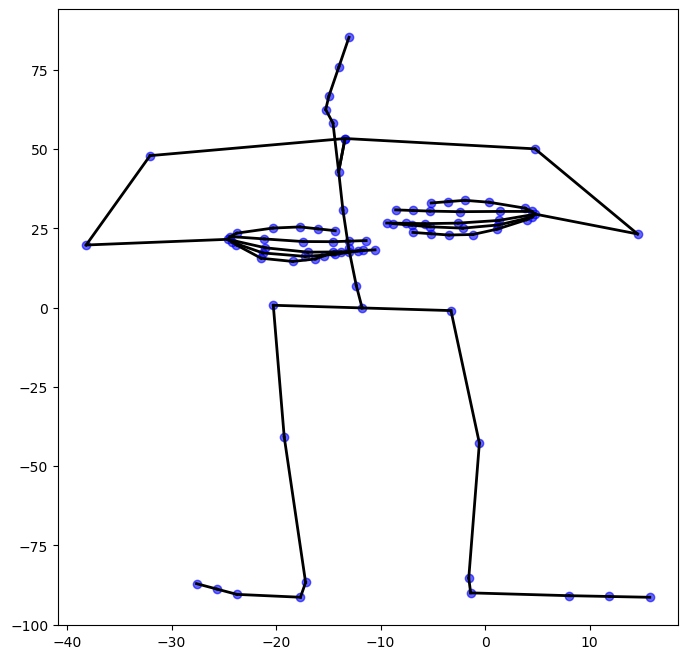

In [8]:
draw_stickfigure(xx[0], 600, xx[0].values)

C:\Users\micha\AppData\Local\Temp\ipykernel_11344\2829019161.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(x=df['%s_Yposition'%joint][frame],
C:\Users\micha\AppData\Local\Temp\ipykernel_11344\2829019161.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=-df['%s_Zposition'%joint][frame],
C:\Users\micha\AppData\Local\Temp\ipykernel_11344\2829019161.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (df['%s_Yposit

KeyError: 'Head_Nub_Yposition'

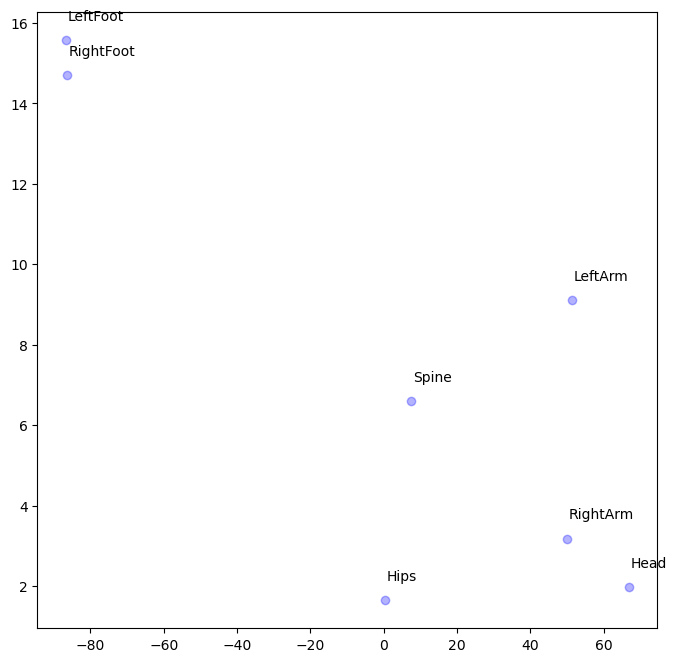

In [10]:
frame = 100
fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
df = xx[0].values  # Convert to DataFrame for easier access
for joint in ['LeftArm', 'RightArm', 'Head', 'LeftFoot','RightFoot','Hips','Spine', 'Head_Nub','RightUpLeg', 'LeftUpLeg']:
    ax.scatter(x=df['%s_Yposition'%joint][frame], 
               y=-df['%s_Zposition'%joint][frame], 
              # zs=df['%s_Yposition'%joint][frame], 
               alpha=0.3, c='b', marker='o')
    ax.annotate(joint, 
                (df['%s_Yposition'%joint][frame] + 0.5, 
                 -df['%s_Zposition'%joint][frame] + 0.5))

In [11]:
xx[0].values.head(10)

,Hips_Xposition,Hips_Yposition,Hips_Zposition,LeftUpLeg_Xposition,LeftUpLeg_Yposition,LeftUpLeg_Zposition,LeftLeg_Xposition,LeftLeg_Yposition,LeftLeg_Zposition,LeftFoot_Xposition,...,Neck1_Zposition,Head_Xposition,Head_Yposition,Head_Zposition,HeadEnd_Xposition,HeadEnd_Yposition,HeadEnd_Zposition,HeadEnd_Nub_Xposition,HeadEnd_Nub_Yposition,HeadEnd_Nub_Zposition
0 days 00:00:00,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934
0 days 00:00:00.008333,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934
0 days 00:00:00.016666,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934
0 days 00:00:00.024999,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934
0 days 00:00:00.033332,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934
0 days 00:00:00.041665,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934
0 days 00:00:00.049998,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934
0 days 00:00:00.058331,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934
0 days 00:00:00.066664,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934
0 days 00:00:00.074997,0.0,0.0,0.0,8.716148,-0.181174,-1.095079,9.775836,-41.246619,-10.626595,11.186846,...,-3.942152,-3.215335,66.873242,-1.618091,-2.77931,76.114093,1.389421,-2.343283,85.354944,4.396934


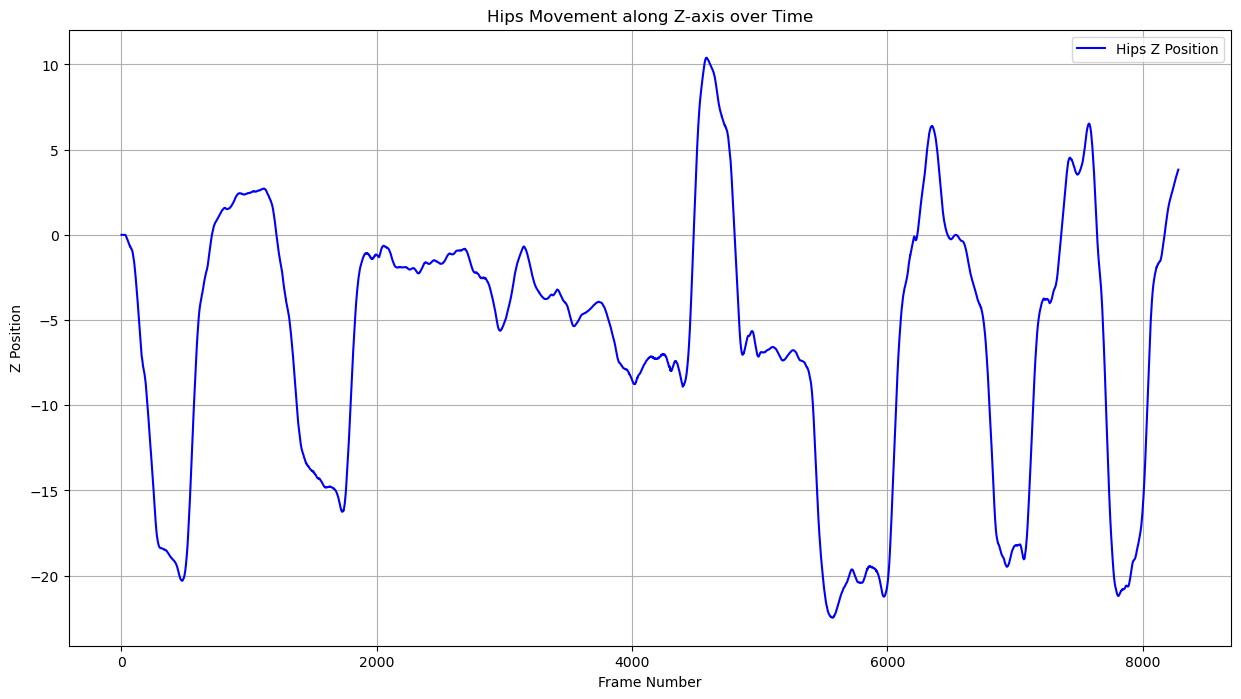

In [12]:
# Get the data as DataFrame
df = xx[0].values

# Create figure with specified size
plt.figure(figsize=(15,8))

# Plot Z position of Hips over time
plt.plot(range(len(df)), df['Hips_Zposition'], 'b-', label='Hips Z Position')

# Add labels and title
plt.title('Hips Movement along Z-axis over Time')
plt.xlabel('Frame Number')
plt.ylabel('Z Position')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<Axes: xlabel='Hips_Xposition', ylabel='Hips_Zposition'>

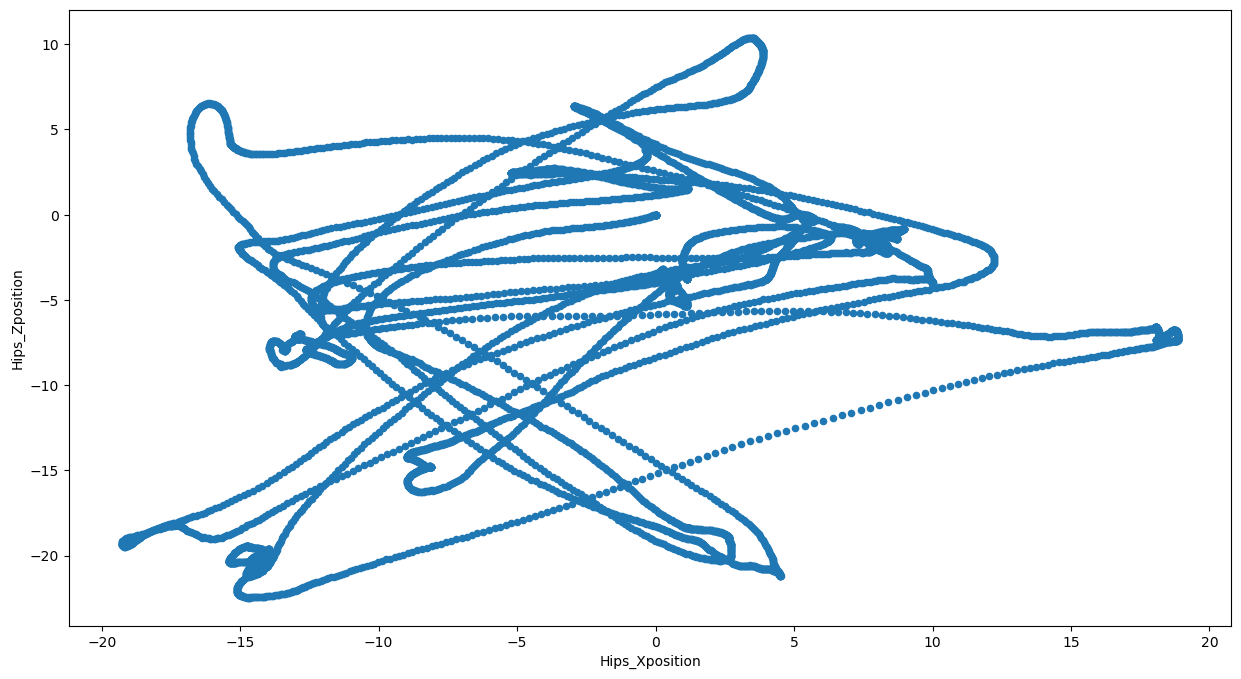

In [13]:
xx[0].values.plot.scatter(x='Hips_Xposition', y='Hips_Zposition', figsize=(15,8))

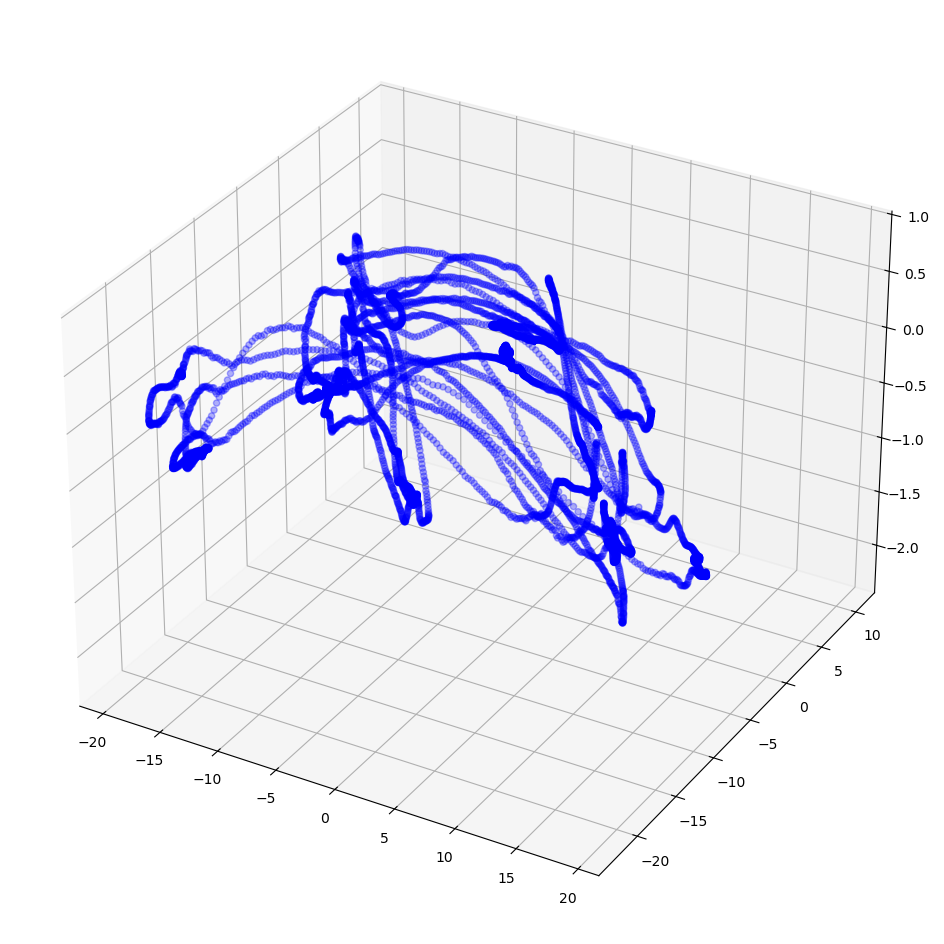

In [14]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df.Hips_Xposition, ys=df.Hips_Zposition,  zs=df.Hips_Yposition, alpha=0.3, c='b', marker='o')

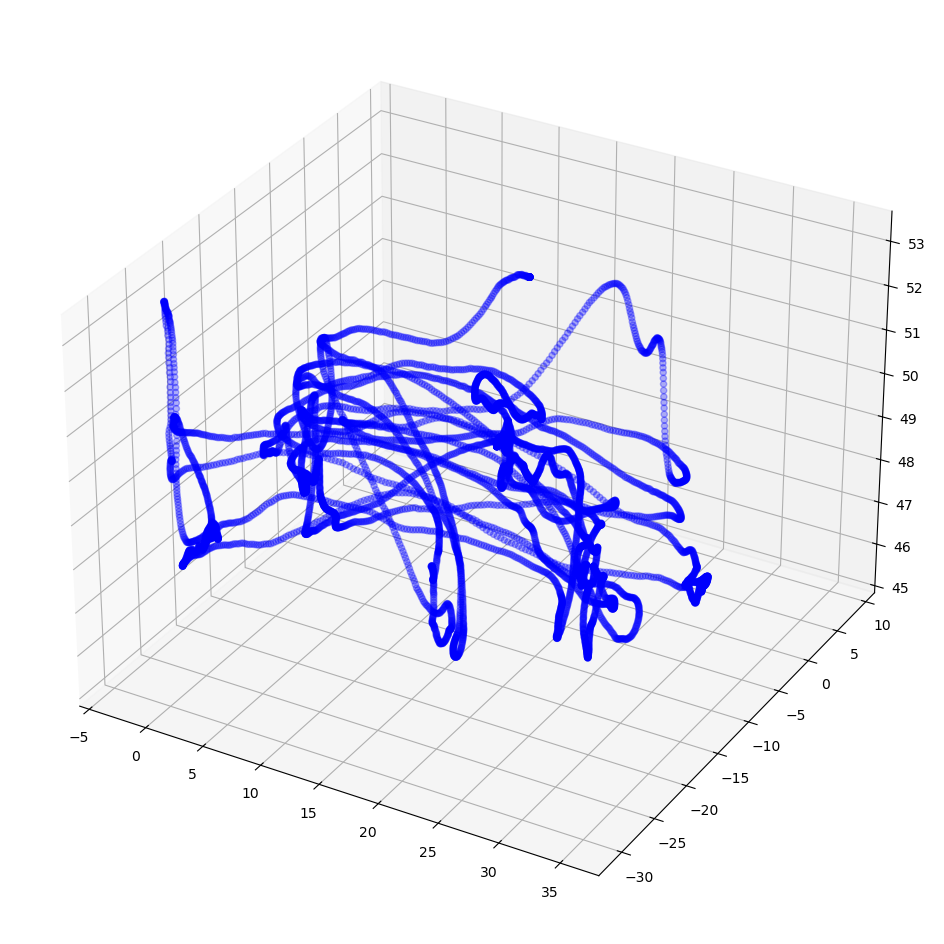

In [15]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df.LeftArm_Xposition, ys=df.LeftArm_Zposition,  zs=df.LeftArm_Yposition, alpha=0.3, c='b', marker='o')